In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

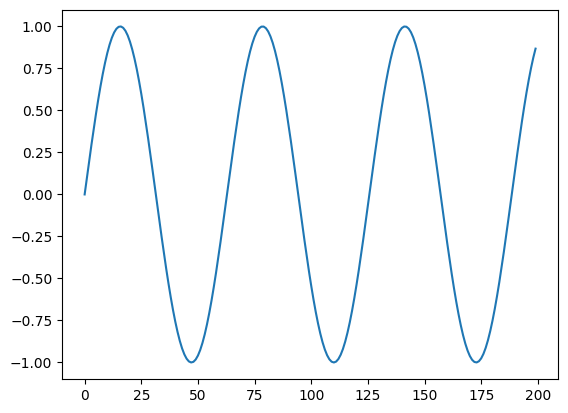

In [4]:
# Make the original data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [5]:
# Build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape:",Y.shape)

X.shape: (190, 10) Y.shape: (190,)


In [9]:
# Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    #optimizator=Adam(lr=0.1), eskiden böyle kullanılıyormuş
    optimizer=Adam(learning_rate=0.1),
)
# Train the RNN
r=model.fit(
    X[:-N//2],Y[:N//2],
    epochs=80,
    validation_data=[X[:-N//2:],Y[:N//2]],
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.8246 - val_loss: 0.4660
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4722 - val_loss: 0.1984
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1491 - val_loss: 0.1723
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1881 - val_loss: 0.1256
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0828 - val_loss: 0.0129
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - val_loss: 0.0843
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0647 - val_loss: 0.0092
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - val_loss: 0.0528
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0500 - val_loss: 0.0156
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - val_loss: 0.0232
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0251 - val_loss: 0.0155
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097 - val_loss: 0.0089


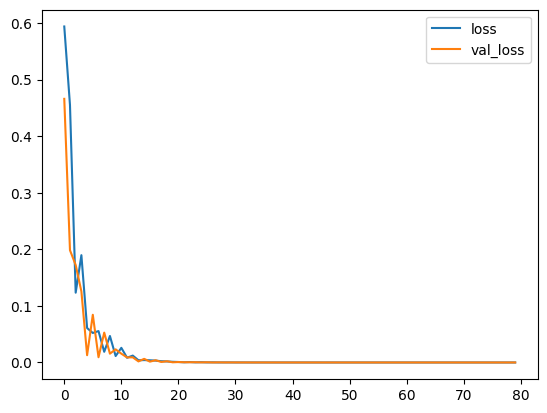

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [14]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first: validation input
i = -N//2

while len(validation_predictions)< len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array -> scalar
  i += 1

  # upradte the predictions list
  validation_predictions.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

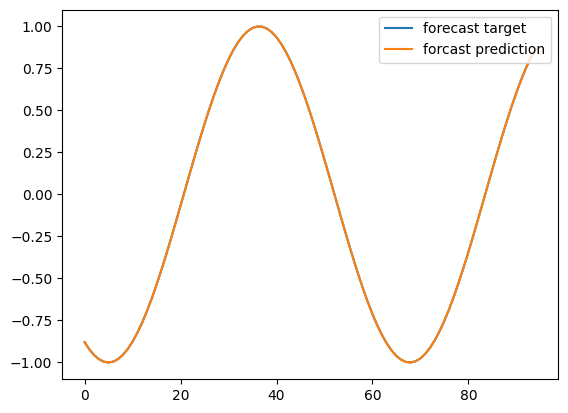

In [15]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forcast prediction')
plt.legend()

In [16]:
# Forecast future values (use only self-preddictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions)< len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

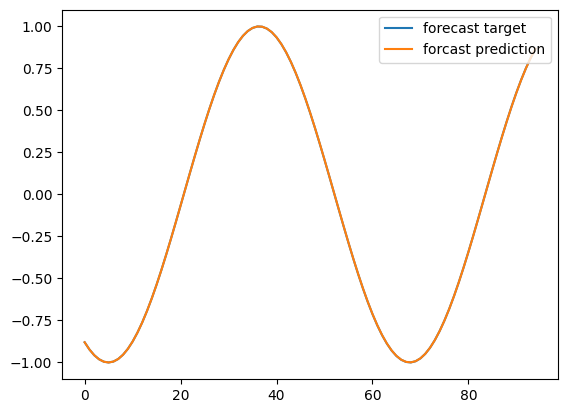

In [17]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forcast prediction')
plt.legend()

We add some noise

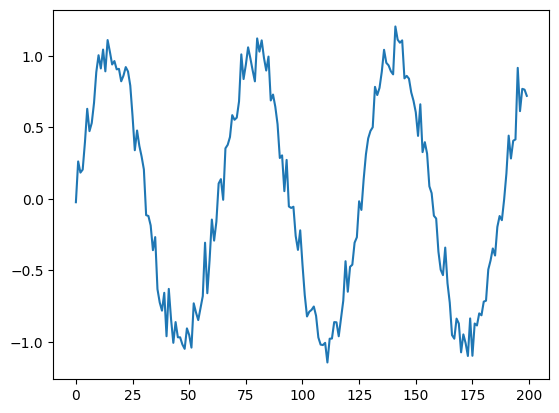

In [18]:
# Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [19]:
# Build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape:",Y.shape)

X.shape: (190, 10) Y.shape: (190,)


In [20]:
# Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    #optimizator=Adam(lr=0.1), eskiden böyle kullanılıyormuş
    optimizer=Adam(learning_rate=0.1),
)
# Train the RNN
r=model.fit(
    X[:-N//2],Y[:N//2],
    epochs=80,
    validation_data=[X[:-N//2:],Y[:N//2]],
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.3007 - val_loss: 0.2001
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1396 - val_loss: 0.1270
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1122 - val_loss: 0.0245
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0431 - val_loss: 0.0841
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0657 - val_loss: 0.0431
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0527 - val_loss: 0.0488
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0384 - val_loss: 0.0438
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0423 - val_loss: 0.0263
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0215 - val_loss: 0.0349
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0337 - val_loss: 0.0219
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0246 - val_loss: 0.0327
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0331 - val_loss: 0.0262
E

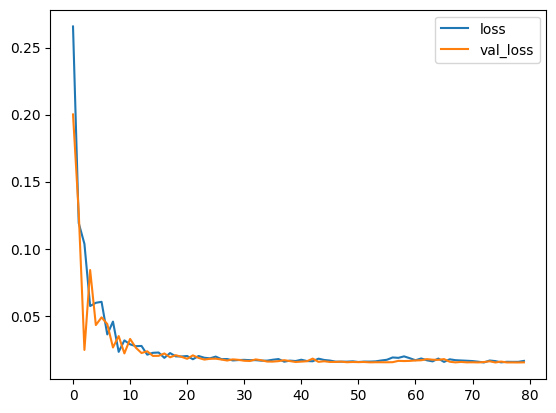

In [21]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [22]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first: validation input
i = -N//2

while len(validation_predictions)< len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array -> scalar
  i += 1

  # upradte the predictions list
  validation_predictions.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

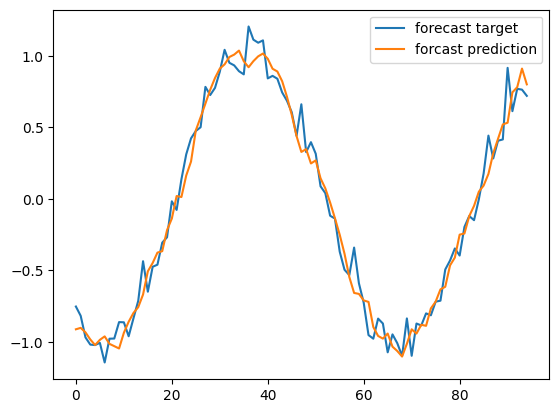

In [23]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forcast prediction')
plt.legend()

In [24]:
# Forecast future values (use only self-preddictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions)< len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

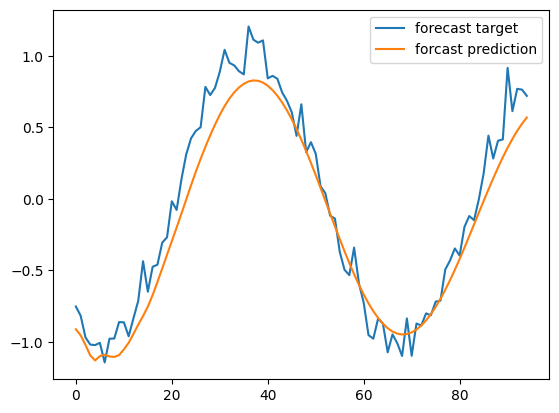

In [25]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forcast prediction')
plt.legend()

---

1. Orijinal Verinin Oluşturulması

In [ ]:
series = np.sin(0.1*np.arange(200))  # Sinüs eğrisi
plt.plot(series)
plt.show()


Amaç: Zaman serisi verisi oluşturur.

np.sin: Sinüs fonksiyonu kullanarak bir eğri üretir.

Çıktı: 200 örnekten oluşan bir sinüs eğrisi.

2. Veri Setinin İnşası

In [ ]:
T = 10  # Geçmiş T adımı tahmin için kullanılır
X = []  # Giriş verisi
Y = []  # Çıkış değeri
for t in range(len(series)-T):
    x = series[t:t+T]  # Geçmiş T değeri al
    X.append(x)
    y = series[t+T]  # Sonraki değer
    Y.append(y)
X = np.array(X).reshape(-1, T)  # Giriş verisini şekillendir
Y = np.array(Y)  # Çıkışı dizine çevir
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)


Amaç: Geçmiş T değeri kullanılarak bir sonraki değeri tahmin edecek bir veri seti oluşturmak.

X: Modelin giriş verisi.

Y: Modelin tahmin etmeye çalıştığı hedef veri.


3. Doğrusal Modelin Tanımlanması

In [ ]:
i = Input(shape=(T,))  # Model giriş boyutunu belirler
x = Dense(1)(i)  # Tek bir nöron ile çıkış
model = Model(i, x)  # Model tanımı
model.compile(
    loss='mse',  # Ortalama Kare Hatası
    optimizer=Adam(learning_rate=0.1)  # Adam optimizasyon algoritması
)


Amaç: Geçmiş T değerine dayalı olarak bir sonraki değeri tahmin eden bir lineer regresyon modeli tanımlamak.

4. Modelin Eğitilmesi

In [ ]:
r = model.fit(
    X[:-N//2], Y[:-N//2],  # Eğitim verisi
    epochs=80,  # Epoch sayısı
    validation_data=[X[-N//2:], Y[-N//2:]]  # Doğrulama verisi
)


Amaç: Model parametrelerini optimize etmek ve doğrulama verisindeki performansı test etmek.

Epoch: Tüm veri seti üzerinde yapılan tam döngü.


5. Kayıp Grafiğinin Çizilmesi

In [ ]:
plt.plot(r.history['loss'], label='loss')  # Eğitim kayıpları
plt.plot(r.history['val_loss'], label='val_loss')  # Doğrulama kayıpları
plt.legend()


Amaç: Eğitim ve doğrulama kayıplarının düşüş eğilimini görselleştirir.

6. Doğru Hedef Kullanarak Tahmin

In [ ]:
validation_target = Y[-N//2:]  # Doğrulama hedefleri
validation_predictions = []  # Tahminler
i = -N//2  # İlk doğrulama girişi

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0]  # Tek tahmin
    i += 1
    validation_predictions.append(p)  # Tahmini ekle
plt.plot(validation_target, label='forecast target')  # Gerçek değerler
plt.plot(validation_predictions, label='forecast prediction')  # Tahmin edilen değerler
plt.legend()


Amaç: Doğru hedefleri kullanarak bir zaman serisi tahmini yapmak.

7. Gelecek Değerlerin Tahmini (Kendi Tahminlerini Kullanarak)

In [ ]:
validation_target = Y[-N//2:]  # Doğrulama hedefleri
validation_predictions = []  # Tahminler
last_x = X[-N//2]  # Son eğitim verisi

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0]  # Tahmin
    validation_predictions.append(p)  # Tahmini ekle
    last_x = np.roll(last_x, -1)  # Giriş kaydır
    last_x[-1] = p  # Tahmini giriş olarak ekle
plt.plot(validation_target, label='forecast target')  # Gerçek değerler
plt.plot(validation_predictions, label='forecast prediction')  # Tahmin edilen değerler
plt.legend()


Amaç: Modelin kendi tahminlerini kullanarak ileriye dönük tahmin yapmasını sağlamak.

Çıktılar:

Tahmin ve Gerçek Değerlerin Görselleştirilmesi: Tahmin edilen ve gerçek zaman serisi arasındaki farkı analiz eder.

Zaman Serisi Tahmini: Modelin ileriye dönük performansı değerlendirilir.